# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [47]:
# Checking the number of mice.
unique_mice_count = combined_df['Mouse ID'].nunique()
print(f'Number of unique mice IDs: {unique_mice_count}')

Number of unique mice IDs: 249


In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Identify duplicate Mouse ID and Timepoint entries
duplicate_entries = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_entries['Mouse ID'].unique()
print(duplicate_mouse_ids)


['g989']


In [49]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_df[combined_df['Mouse ID'] == 'g989']
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Check for any remaining duplicate Mouse ID and Timepoint entries

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Remove the data for the duplicate mouse ID 'g989'
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']

# Display the first five rows of the cleaned DataFrame
cleaned_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = cleaned_df['Mouse ID'].nunique()
print(f'Number of unique mice in the cleaned DataFrame: {unique_mice_count}')

Number of unique mice in the cleaned DataFrame: 248


## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
).reset_index()

# Display the summary statistics table
summary_stats

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Display the summary statistics table
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

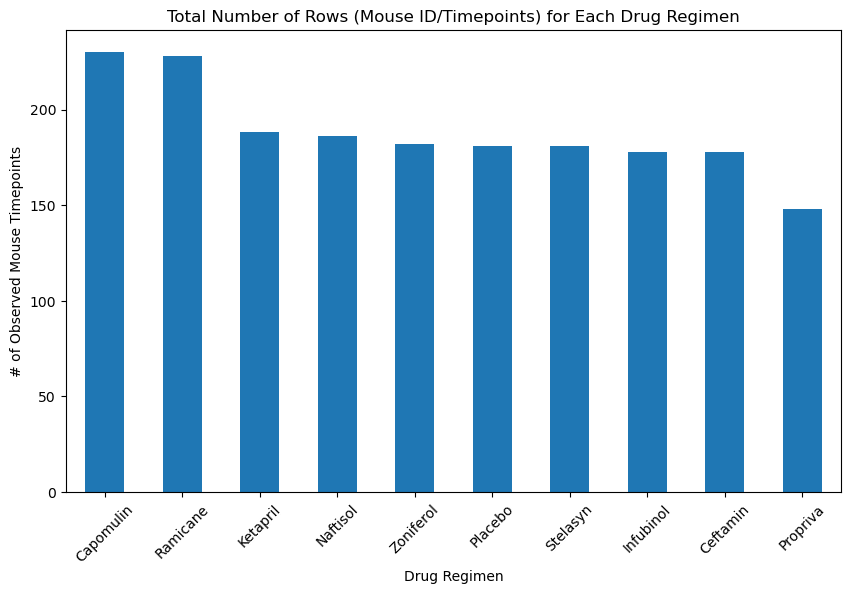

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Create the bar plot
drug_regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

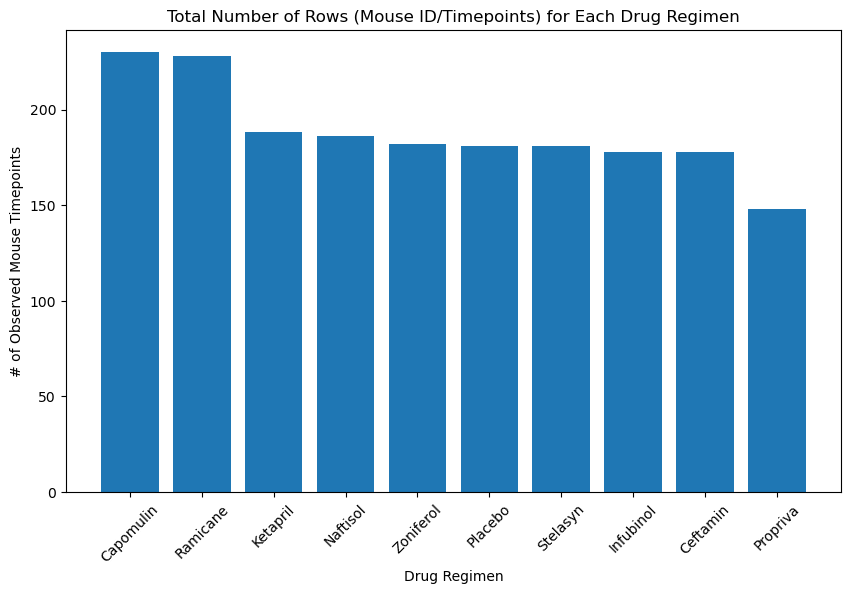

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Create the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

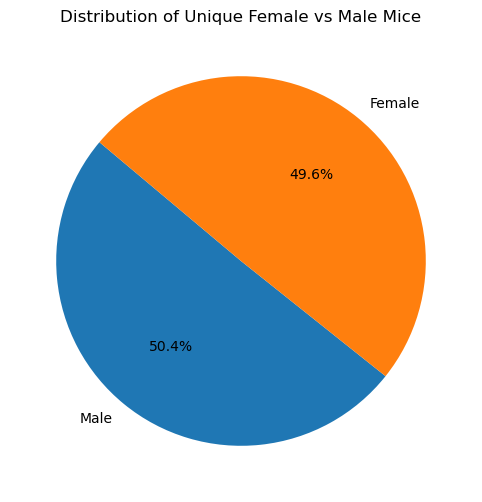

In [56]:
# Get the unique mice with their gender
unique_mice = cleaned_df[['Mouse ID', 'Sex']].drop_duplicates()

# Generate a pie chart showing the distribution of unique female versus male mice
gender_distribution = unique_mice['Sex'].value_counts()

# Create the pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 6))
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')
plt.show()


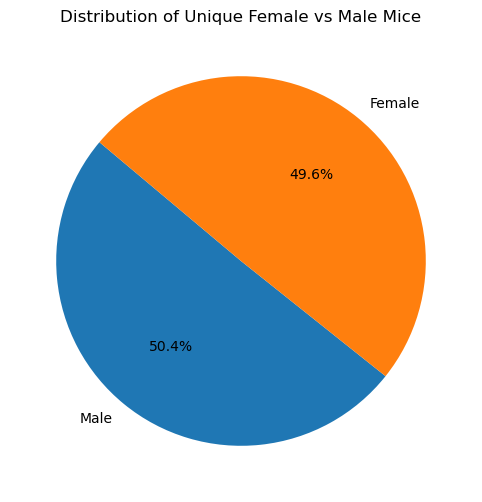

In [57]:
# Get the unique mice with their gender
unique_mice = cleaned_df[['Mouse ID', 'Sex']].drop_duplicates()

# Generate a pie chart showing the distribution of unique female versus male mice
gender_distribution = unique_mice['Sex'].value_counts()

# Create the pie chart using pyplot
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')
plt.show()


## Quartiles, Outliers and Boxplots

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


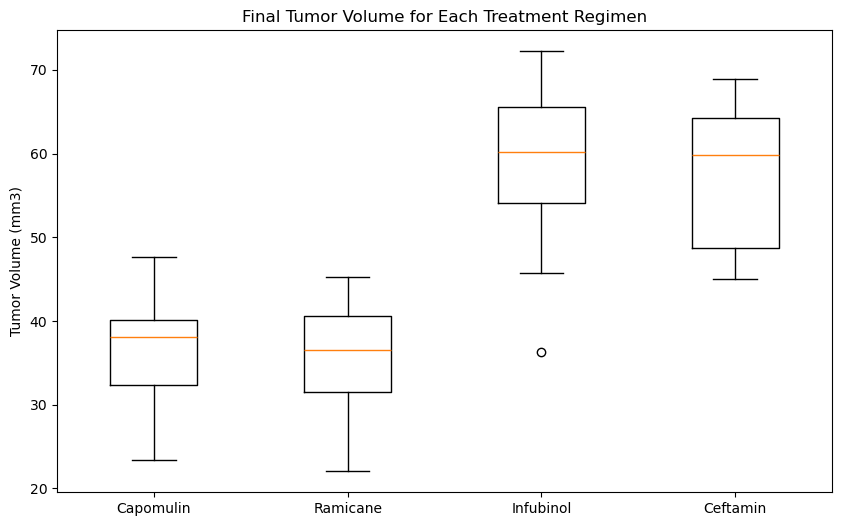

In [58]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds# Get the last (greatest) timepoint for each mouse
last_timepoints = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = last_timepoints.merge(cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DataFrame to include only the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatments)]

# Calculate the IQR and identify potential outliers
tumor_volumes = []

for treatment in treatments:
    treatment_data = filtered_df[filtered_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(treatment_data)
    
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}")

# Create a box plot for the final tumor volumes of the four treatment regimens
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tumor_volumes, labels=treatments)
ax.set_title('Final Tumor Volume for Each Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

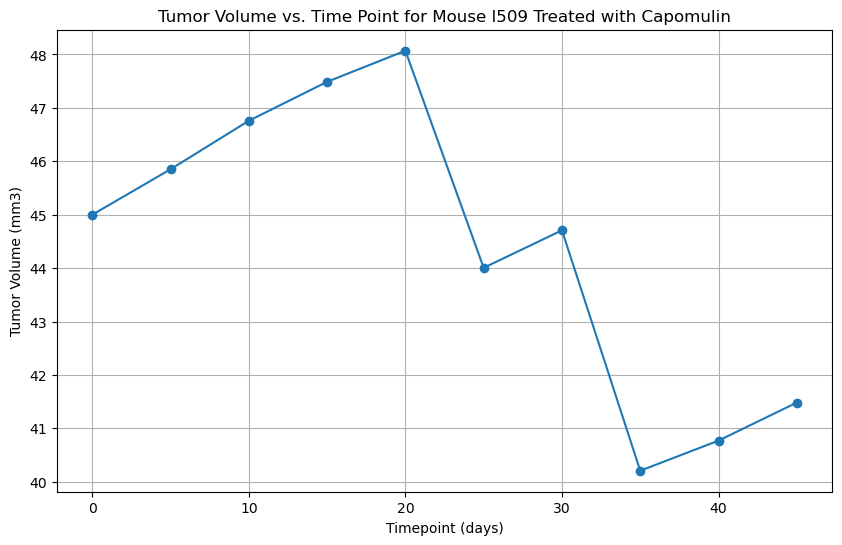

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()



Correlation coefficient: 0.8419363424694721


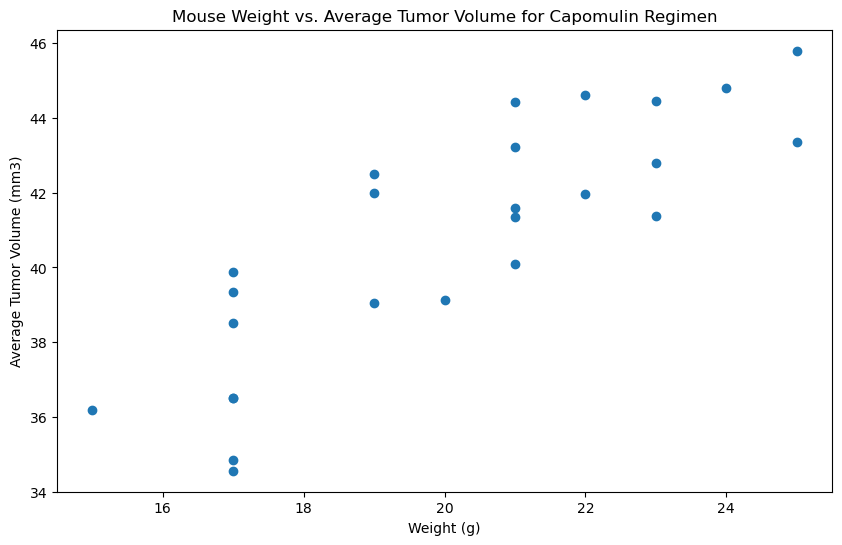

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the average tumor volume for each mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the mean for the numeric columns
avg_tumor_volumes = capomulin_data.groupby('Mouse ID').agg({
    'Weight (g)': 'mean',
    'Tumor Volume (mm3)': 'mean'
}).reset_index()

# Generate a scatter plot of mouse weight versus average observed tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volumes['Weight (g)'], avg_tumor_volumes['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volumes['Weight (g)'], avg_tumor_volumes['Tumor Volume (mm3)'])


# Print the correlation coefficient
print(f'Correlation coefficient: {r_value}')

## Correlation and Regression

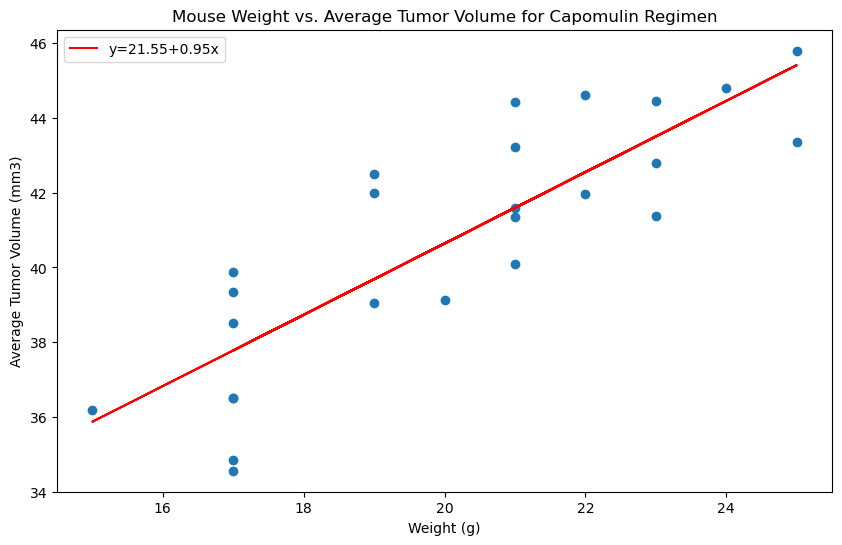

Correlation coefficient: 0.8419363424694721


In [61]:
# Calculate the correlation coefficient and a linear regression model


# Calculate the average tumor volume for each mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the mean for the numeric columns
avg_tumor_volumes = capomulin_data.groupby('Mouse ID').agg({
    'Weight (g)': 'mean',
    'Tumor Volume (mm3)': 'mean'
}).reset_index()

# Generate a scatter plot of mouse weight versus average observed tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volumes['Weight (g)'], avg_tumor_volumes['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volumes['Weight (g)'], avg_tumor_volumes['Tumor Volume (mm3)'])

# Plot the linear regression model on top of the scatter plot
plt.plot(avg_tumor_volumes['Weight (g)'], intercept + slope * avg_tumor_volumes['Weight (g)'], 'r', label=f'y={intercept:.2f}+{slope:.2f}x')
plt.legend()
plt.show()

# Print the correlation coefficient
print(f'Correlation coefficient: {r_value}')
